In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt


In [9]:
img_height, img_width = 32, 32
batch_size = 20

train_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/veg classification/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/veg classification/validation",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/veg classification/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)


Found 359 files belonging to 3 classes.
Found 76 files belonging to 3 classes.
Found 179 files belonging to 3 classes.


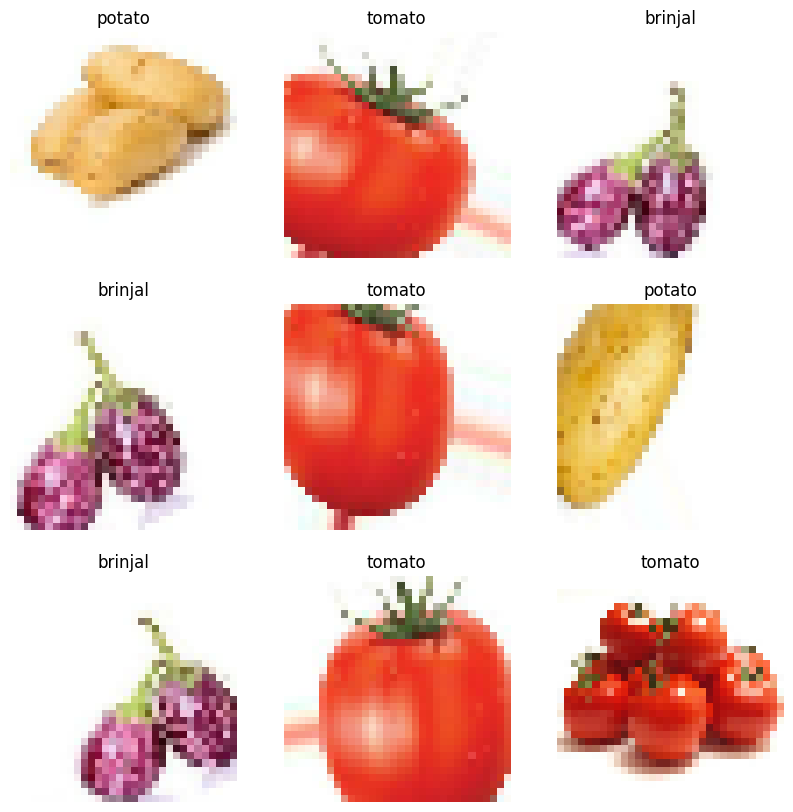

In [18]:
class_names = ["brinjal","potato","tomato" ]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [19]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(3)
    ]
)



In [20]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)


In [21]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 10
)


Epoch 1/10
18/18 [==============================] - 2s 25ms/step - loss: 1.0308 - accuracy: 0.4875 - val_loss: 0.8889 - val_accuracy: 0.8553
Epoch 2/10
18/18 [==============================] - 1s 21ms/step - loss: 0.6298 - accuracy: 0.8579 - val_loss: 0.4541 - val_accuracy: 0.8816
Epoch 3/10
18/18 [==============================] - 1s 21ms/step - loss: 0.2554 - accuracy: 0.9304 - val_loss: 0.1979 - val_accuracy: 0.8816
Epoch 4/10
18/18 [==============================] - 1s 26ms/step - loss: 0.1540 - accuracy: 0.9471 - val_loss: 0.1065 - val_accuracy: 0.9474
Epoch 5/10
18/18 [==============================] - 1s 30ms/step - loss: 0.1380 - accuracy: 0.9387 - val_loss: 0.2311 - val_accuracy: 0.8816
Epoch 6/10
18/18 [==============================] - 1s 30ms/step - loss: 0.0430 - accuracy: 0.9889 - val_loss: 0.0317 - val_accuracy: 1.0000
Epoch 7/10
18/18 [==============================] - 1s 30ms/step - loss: 0.0303 - accuracy: 0.9916 - val_loss: 0.0483 - val_accuracy: 1.0000
Epoch 8/10
18

In [22]:
model.evaluate(test_ds)


9/9 [==============================] - 0s 3ms/step - loss: 0.0168 - accuracy: 0.9944


[0.01675463654100895, 0.994413435459137]

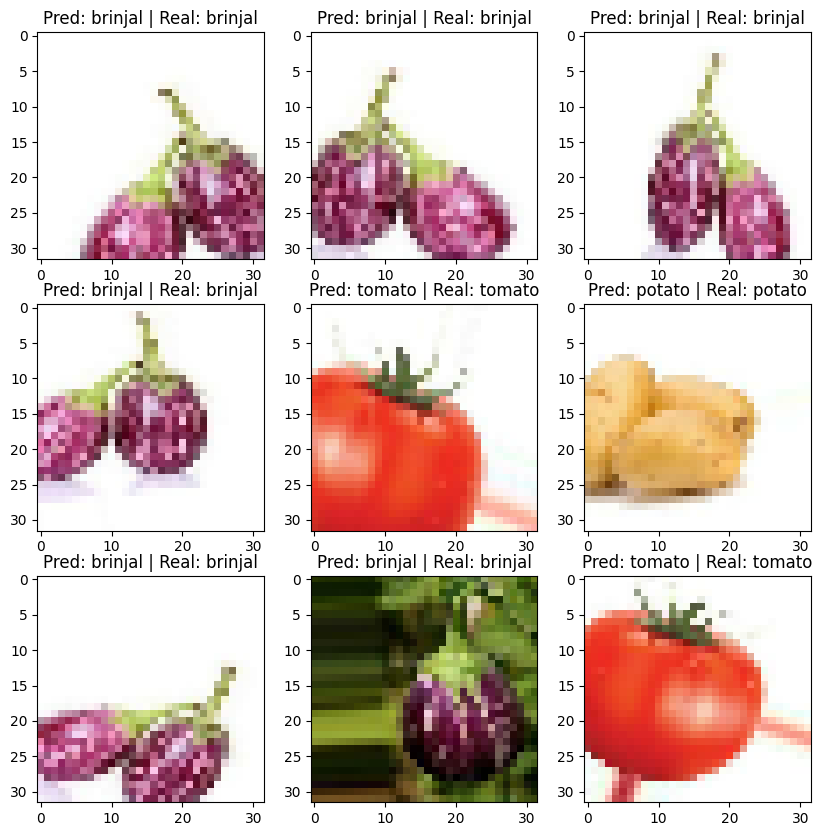

In [23]:
# %% [code]
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)
  
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])


In [24]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("vegi classi model.tflite", 'wb') as f:
  f.write(tflite_model)


